<a href="https://colab.research.google.com/github/Lakshman511/EVA4/blob/master/S11/Eva4_S11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from torchvision import datasets
train=datasets.CIFAR10("./data",train=True,download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
from tqdm import tqdm_notebook
from PIL import Image

In [0]:
a=255
import numpy as np
n=0
s=np.zeros(3)
sq=np.zeros(3)

In [0]:
for data,l in tqdm_notebook(train):
  x=np.array(data)/a
  s+=x.sum(axis=(0,1))
  sq+=np.sum(np.square(x),axis=(0,1))
  n+=x.shape[0]*x.shape[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
mu=s/n
std=np.sqrt((sq/n-np.square(mu)))

In [0]:
print(mu,std)

[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


In [0]:
nms=[mu,std]

In [0]:
import sys
sys.path.append("/content/drive/My Drive/myLibrary")

In [0]:
import numpy as np
from eva4albumentations import Albumentations

In [0]:
a,b=40,3

In [0]:
b=32

In [0]:
c=(1,8,8,True)

In [0]:
p=(a,a,4,None,None,True)

In [0]:
rc=(b,b,True)

In [0]:
test_transforms=Albumentations(nms)
train_transforms=Albumentations(nms,Padding=p,RandomCrop=rc,HorizontalFlip=True,cutout=c)

In [0]:
train=datasets.CIFAR10("./data",train=True,download=True,transform=train_transforms)
test=datasets.CIFAR10("./data",train=False,download=True,transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
import eva4dataloaders

In [0]:
batch_size=512

In [0]:
dataloader=eva4dataloaders.DataLoader(batch_size=batch_size)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

In [0]:
from __future__ import print_function
def unnormalize(img):
  img=img.numpy().astype(dtype=np.float32)
  for i in range(img.shape[0]):
    img[i]=(img[i]*std[i])+mu[i]
  return np.transpose(img,(1,2,0))  

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([512, 3, 32, 32])
torch.Size([512])


In [0]:
num_classes=10
r,c=10,11
n=5
b=14


In [0]:
e=0.01
x=-1.5
y=0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


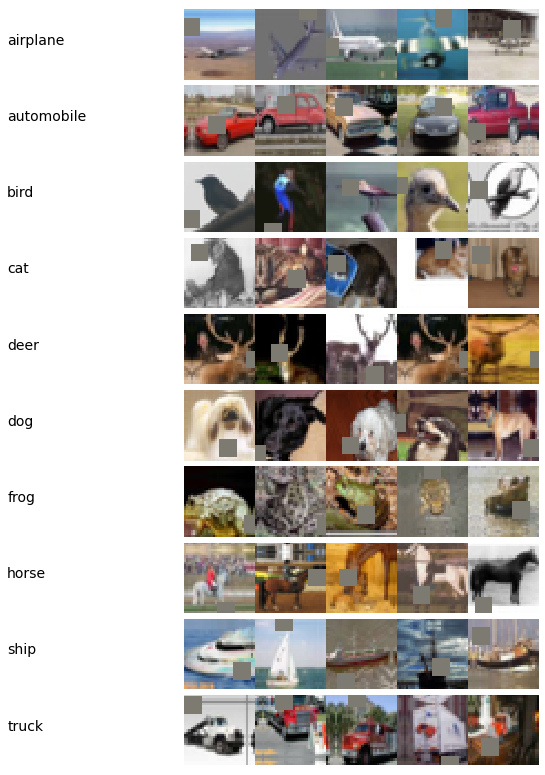

In [0]:
fig=plt.figure(figsize=(b,b))
fig.subplots_adjust(hspace=e,wspace=e)
for i in range(num_classes):
  idx=np.random.choice(np.where(labels[:]==i)[0],n)
  ax=plt.subplot(r,c,i*c+1)
  ax.text(x,y,class_names[i],fontsize=b)
  plt.axis('off')
  for j in range(1,n+1):
    plt.subplot(r,c,i*c+j+1)
    plt.imshow(unnormalize(images[idx[j-1]]),interpolation='none')
    plt.axis('off')
plt.show()    

Files already downloaded and verified



Files already downloaded and verified
Files already downloaded and verified



Validation loss decreased (100000.000000 --> 1.892305).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0042, Accuracy: 22.53%; Test set: Average loss: 1.8923, Accuracy: 33.09%
Learning Rate = 0.000100



Validation loss decreased (1.892305 --> 1.640028).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0035, Accuracy: 35.66%; Test set: Average loss: 1.6400, Accuracy: 41.78%
Learning Rate = 0.000140



Validation loss decreased (1.640028 --> 1.465625).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0031, Accuracy: 42.69%; Test set: Average loss: 1.4656, Accuracy: 47.93%
Learning Rate = 0.000196



Validation loss decreased (1.465625 --> 1.337631).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0029, Accuracy: 47.61%; Test set: Average loss: 1.3376, Accuracy: 52.32%
Learning Rate = 0.000274



Validation loss decreased (1.337631 --> 1.238654).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0026, Accuracy: 52.27%; Test set: Average loss: 1.2387, Accuracy: 55.72%
Learning Rate = 0.000384



Validation loss decreased (1.238654 --> 1.175132).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0024, Accuracy: 56.03%; Test set: Average loss: 1.1751, Accuracy: 58.43%
Learning Rate = 0.000538



Validation loss decreased (1.175132 --> 1.047742).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0022, Accuracy: 60.01%; Test set: Average loss: 1.0477, Accuracy: 62.86%
Learning Rate = 0.000753



Validation loss decreased (1.047742 --> 0.971918).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0020, Accuracy: 63.32%; Test set: Average loss: 0.9719, Accuracy: 65.68%
Learning Rate = 0.001054



Validation loss decreased (0.971918 --> 0.873990).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0018, Accuracy: 66.83%; Test set: Average loss: 0.8740, Accuracy: 68.63%
Learning Rate = 0.001476



Validation loss decreased (0.873990 --> 0.814788).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0017, Accuracy: 69.61%; Test set: Average loss: 0.8148, Accuracy: 71.22%
Learning Rate = 0.002066



Validation loss decreased (0.814788 --> 0.776640).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0015, Accuracy: 72.34%; Test set: Average loss: 0.7766, Accuracy: 72.68%
Learning Rate = 0.002893



Validation loss decreased (0.776640 --> 0.719267).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0014, Accuracy: 74.65%; Test set: Average loss: 0.7193, Accuracy: 75.34%
Learning Rate = 0.004050



Epoch: 13, Train set: Average loss: 0.0014, Accuracy: 75.65%; Test set: Average loss: 0.7610, Accuracy: 74.83%
Learning Rate = 0.005669



Validation loss decreased (0.719267 --> 0.615219).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0014, Accuracy: 76.25%; Test set: Average loss: 0.6152, Accuracy: 79.05%
Learning Rate = 0.007937



Epoch: 15, Train set: Average loss: 0.0015, Accuracy: 75.86%; Test set: Average loss: 0.8099, Accuracy: 75.62%
Learning Rate = 0.011112



Epoch: 16, Train set: Average loss: 0.0016, Accuracy: 75.65%; Test set: Average loss: 1.1091, Accuracy: 73.25%
Learning Rate = 0.015557



Epoch: 17, Train set: Average loss: 0.0023, Accuracy: 72.46%; Test set: Average loss: 1.6036, Accuracy: 71.42%
Learning Rate = 0.021780



Epoch: 18, Train set: Average loss: 0.0019, Accuracy: 75.07%; Test set: Average loss: 0.6368, Accuracy: 80.81%
Learning Rate = 0.030491



Epoch: 19, Train set: Average loss: 0.0021, Accuracy: 75.37%; Test set: Average loss: 2.9518, Accuracy: 61.36%
Learning Rate = 0.042688



Epoch: 20, Train set: Average loss: 0.0026, Accuracy: 72.90%; Test set: Average loss: 0.7059, Accuracy: 79.19%
Learning Rate = 0.059763



Validation loss decreased (0.615219 --> 0.509433).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0011, Accuracy: 82.43%; Test set: Average loss: 0.5094, Accuracy: 83.74%
Learning Rate = 0.083668



Epoch: 22, Train set: Average loss: 0.0010, Accuracy: 83.14%; Test set: Average loss: 0.5593, Accuracy: 82.81%
Learning Rate = 0.117136



Validation loss decreased (0.509433 --> 0.460160).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0009, Accuracy: 84.10%; Test set: Average loss: 0.4602, Accuracy: 85.05%
Learning Rate = 0.163990



Validation loss decreased (0.460160 --> 0.449207).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0009, Accuracy: 84.44%; Test set: Average loss: 0.4492, Accuracy: 85.62%
Learning Rate = 0.229586



Epoch: 25, Train set: Average loss: 0.0044, Accuracy: 30.87%; Test set: Average loss: 1.8951, Accuracy: 28.56%
Learning Rate = 0.321420



Epoch: 26, Train set: Average loss: 0.0033, Accuracy: 37.88%; Test set: Average loss: 1.7251, Accuracy: 39.99%
Learning Rate = 0.449988



Epoch: 27, Train set: Average loss: 0.0027, Accuracy: 50.80%; Test set: Average loss: 1.2897, Accuracy: 56.99%
Learning Rate = 0.629983



Epoch: 28, Train set: Average loss: 0.0343, Accuracy: 45.61%; Test set: Average loss: 3731.9375, Accuracy: 10.00%
Learning Rate = 0.881976



Epoch: 29, Train set: Average loss: 173.1910, Accuracy: 10.46%; Test set: Average loss: 65927405.5680, Accuracy: 10.00%
Learning Rate = 1.234767



Epoch: 30, Train set: Average loss: 65.7757, Accuracy: 10.04%; Test set: Average loss: 12153.9025, Accuracy: 10.00%
Learning Rate = 1.728674



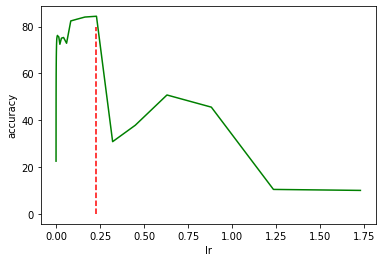

In [0]:
from eva4lr_range_test import lr_range_test
max_lr=lr_range_test()

In [0]:
max_lr=int(max_lr*100)/100
min_lr=max_lr/10#max_la

In [0]:
print(min_lr,max_lr)

0.022 0.22


In [0]:
import eva4models11

In [0]:
model=eva4models11.ResNetforS11().to("cuda")

In [0]:
from eva4statsmanager import StatsManager

In [0]:
statsmanager=StatsManager()

In [0]:
model.summary((3,32,32 ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [0]:
L2lambda=0
EPOCHS=24
a=10
b=0.2

In [0]:
optimizer=optim.SGD(model.parameters(),lr=min_lr,momentum=0.9,nesterov=True,weight_decay=L2lambda)#)

In [0]:
scheduler=OneCycleLR(optimizer,max_lr=max_lr,steps_per_epoch=len(train_loader),pct_start=b,epochs=EPOCHS,div_factor=a,final_div_factor=10,anneal_strategy="linear")

In [0]:
model.gotrain(optimizer,train_loader,test_loader,EPOCHS,"/content/drive/My Drive",statsmanager,scheduler,True,0)


Validation loss decreased (100000.000000 --> 2.539044).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0114, Accuracy: 12.61%; Test set: Average loss: 2.5390, Accuracy: 13.65%
Learning Rate = 0.063338



Validation loss decreased (2.539044 --> 1.972914).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0044, Accuracy: 21.93%; Test set: Average loss: 1.9729, Accuracy: 30.27%
Learning Rate = 0.104676



Validation loss decreased (1.972914 --> 1.662578).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0037, Accuracy: 32.88%; Test set: Average loss: 1.6626, Accuracy: 37.86%
Learning Rate = 0.146014



Validation loss decreased (1.662578 --> 1.516054).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0032, Accuracy: 40.46%; Test set: Average loss: 1.5161, Accuracy: 43.46%
Learning Rate = 0.187352



Validation loss decreased (1.516054 --> 1.407094).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0029, Accuracy: 45.12%; Test set: Average loss: 1.4071, Accuracy: 48.97%
Learning Rate = 0.217615



Epoch: 6, Train set: Average loss: 0.0027, Accuracy: 49.74%; Test set: Average loss: 1.4122, Accuracy: 48.82%
Learning Rate = 0.206272



Validation loss decreased (1.407094 --> 1.223650).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0025, Accuracy: 54.00%; Test set: Average loss: 1.2237, Accuracy: 56.57%
Learning Rate = 0.194928



Validation loss decreased (1.223650 --> 1.048776).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0023, Accuracy: 58.14%; Test set: Average loss: 1.0488, Accuracy: 61.92%
Learning Rate = 0.183584



Validation loss decreased (1.048776 --> 0.981346).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0021, Accuracy: 62.27%; Test set: Average loss: 0.9813, Accuracy: 64.63%
Learning Rate = 0.172240



Validation loss decreased (0.981346 --> 0.907528).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0019, Accuracy: 65.85%; Test set: Average loss: 0.9075, Accuracy: 67.93%
Learning Rate = 0.160897



Validation loss decreased (0.907528 --> 0.894326).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0018, Accuracy: 68.38%; Test set: Average loss: 0.8943, Accuracy: 68.94%
Learning Rate = 0.149553



Validation loss decreased (0.894326 --> 0.812921).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0016, Accuracy: 70.44%; Test set: Average loss: 0.8129, Accuracy: 71.39%
Learning Rate = 0.138209



Validation loss decreased (0.812921 --> 0.752424).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0015, Accuracy: 72.70%; Test set: Average loss: 0.7524, Accuracy: 73.56%
Learning Rate = 0.126865



Validation loss decreased (0.752424 --> 0.712213).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0014, Accuracy: 74.50%; Test set: Average loss: 0.7122, Accuracy: 75.19%
Learning Rate = 0.115522



Validation loss decreased (0.712213 --> 0.660443).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0013, Accuracy: 76.55%; Test set: Average loss: 0.6604, Accuracy: 76.77%
Learning Rate = 0.104178



Validation loss decreased (0.660443 --> 0.641003).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0012, Accuracy: 77.75%; Test set: Average loss: 0.6410, Accuracy: 77.80%
Learning Rate = 0.092834



Validation loss decreased (0.641003 --> 0.597403).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0012, Accuracy: 79.10%; Test set: Average loss: 0.5974, Accuracy: 79.36%
Learning Rate = 0.081490



Validation loss decreased (0.597403 --> 0.570051).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0011, Accuracy: 80.21%; Test set: Average loss: 0.5701, Accuracy: 80.11%
Learning Rate = 0.070147



Validation loss decreased (0.570051 --> 0.537935).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0011, Accuracy: 81.08%; Test set: Average loss: 0.5379, Accuracy: 81.38%
Learning Rate = 0.058803



Validation loss decreased (0.537935 --> 0.529097).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0010, Accuracy: 82.29%; Test set: Average loss: 0.5291, Accuracy: 81.95%
Learning Rate = 0.047459



Validation loss decreased (0.529097 --> 0.490037).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0009, Accuracy: 83.28%; Test set: Average loss: 0.4900, Accuracy: 83.34%
Learning Rate = 0.036115



Validation loss decreased (0.490037 --> 0.483527).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0009, Accuracy: 84.06%; Test set: Average loss: 0.4835, Accuracy: 83.43%
Learning Rate = 0.024772



Validation loss decreased (0.483527 --> 0.471822).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0008, Accuracy: 84.98%; Test set: Average loss: 0.4718, Accuracy: 84.25%
Learning Rate = 0.013428



Validation loss decreased (0.471822 --> 0.447179).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0008, Accuracy: 85.92%; Test set: Average loss: 0.4472, Accuracy: 84.90%
Learning Rate = 0.002084



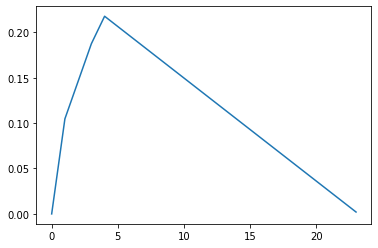

In [0]:
plt.plot(statsmanager.data["lr"])

In [0]:
from plots import plots

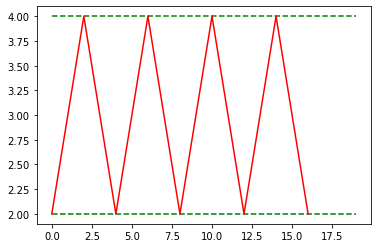

In [0]:
pl=plots()
pl.triangularPlot(2,4,4,4)